In [1]:
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
import math
import sys

# Data loading :

Loading image berupa anjing jenis Rhodesian Ridgeback.

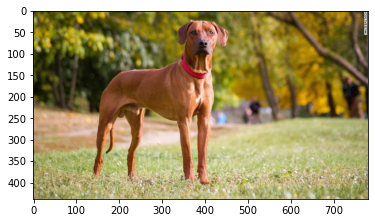

In [57]:
img = Image.open('/Users/dimas/Documents/data-science/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg')
R, G, B = img.split() # Membagikan warna gambar tersebut menjadi 3, R = Red, G = Green, B = Blue 
R = np.array(R)
G = np.array(G)
B = np.array(B)

Gray = (0.2989 * R) + (0.5870 * G) + (0.1140 * B)

plt.imshow(img)
plt.show()

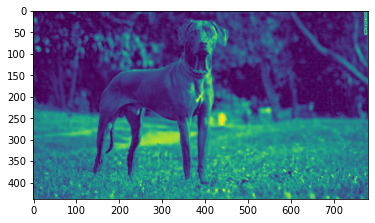

In [17]:
plt.imshow(B) # Menggunakan warna biru, karena saya suka warna biru.

plt.show()

In [41]:
np.shape(B)

(438, 780)

# Data Transformation :

In [19]:
np.shape(B) # Bentuk array tersebut, 438 kolom, 780 baris.

(438, 780)

In [20]:
array = np.array(B) # Mengubah gambar menjadi array yang biasanya di panggil berupa pixel.

In [21]:
dx, dy = np.gradient(array) # Menggunakan rumus Vektor Gradien (Turunan Parsial). 

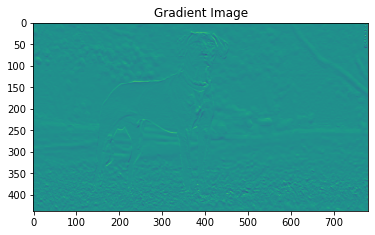

In [22]:
plt.imshow(dx) # Dari vektor yang sudah diturunkan parsial, di ubah image tersebut menjadi array.
plt.title('Gradient Image')
plt.show()

In [23]:
mag = np.sqrt(np.power(dx,2)+(np.power(dy,2))) # Gradient Magnitude

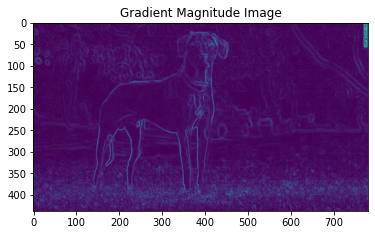

In [24]:
plt.imshow(mag) # Display gambar dari Gradient Magnitude tersebut.
plt.title('Gradient Magnitude Image')
plt.show()

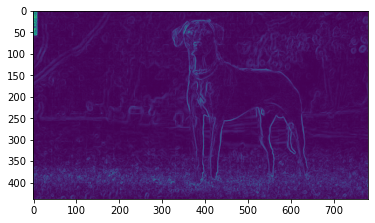

In [25]:
revmag = np.fliplr(mag)
plt.imshow(revmag)
plt.show()

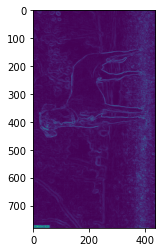

In [26]:
transpose= np.transpose(mag)

plt.imshow(transpose)

# Thresholding :
- Istilah simple thresholding adalah membagi atau menyederhanakan.
- Di sini kita menggunakan thresholding untuk membagi/menyederhanakan pixel tersebut.

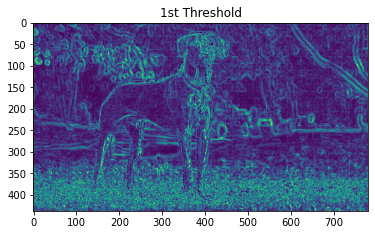

In [27]:
thres1 = (mag < 30) * mag # Threshold pertama
plt.imshow(thres1)
plt.title('1st Threshold')
plt.show()

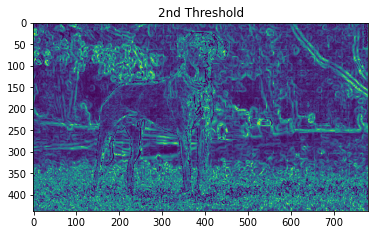

In [28]:
thres2 = (mag < 20) * mag # Threshold kedua
plt.imshow(thres2)
plt.title('2nd Threshold')
plt.show()

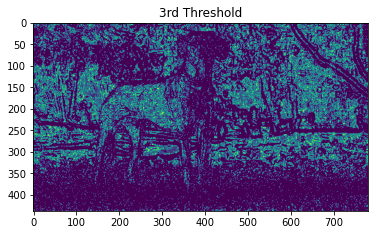

In [29]:
thres3 = (mag < 3) * mag # Threshold ketiga
plt.imshow(thres3)
plt.title('3rd Threshold')
plt.show()

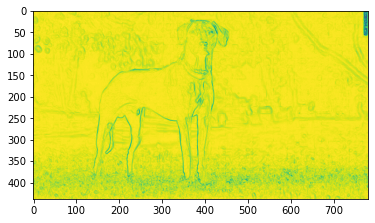

In [30]:
res1 = ((1 / 438) * np.array(mag)) * np.tan(2) # rumus buatan sendiri, modifikasi dari gaussian filter : (1/shape(kolom)* (gradientmag)* tan(N-dimensional array))
plt.imshow(res1)

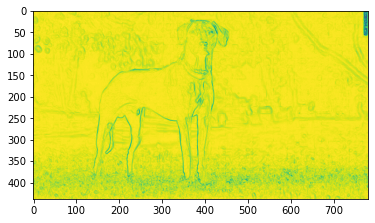

In [31]:
res2 = ((1 / 780) * np.array(mag)) * np.tan(2) # rumus buatan sendiri, modifikasi dari gaussian filter : (1/shape(baris)* (gradientmag)* tan(N-dimensional array))
plt.imshow(res2)

# Bonus :
# Analyze Data Distribution ;

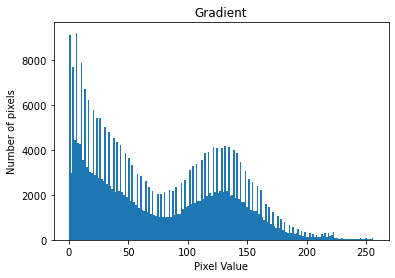

In [32]:
x = array.flatten()

plt.hist(x,bins=180, range=[0,256])
plt.xlabel('Pixel Value')
plt.ylabel('Number of pixels')
plt.title('Gradient')

plt.show()

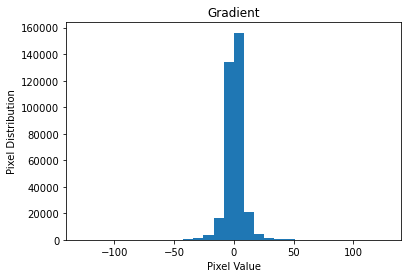

In [33]:
x1 = dx.flatten()

plt.hist(x1, bins = 30)
plt.xlabel('Pixel Value')
plt.ylabel('Pixel Distribution')
plt.title('Gradient')

plt.show()

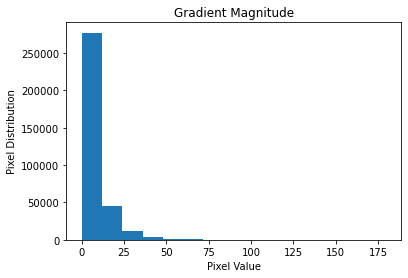

In [34]:
x2 = mag.flatten()

plt.hist(x2, bins = 15)
plt.xlabel('Pixel Value')
plt.ylabel('Pixel Distribution')
plt.title('Gradient Magnitude')

plt.show()

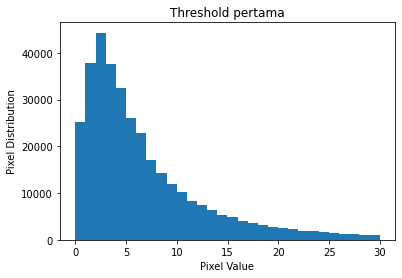

In [35]:
x3 = thres1.flatten()

plt.hist(x3, bins= 30)
plt.xlabel('Pixel Value')
plt.ylabel('Pixel Distribution')
plt.title('Threshold pertama')

plt.show()

Text(0, 0.5, 'Pixel Distribution')

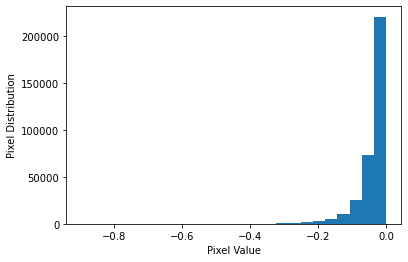

In [36]:
x4 = res1.flatten()

plt.hist(x4, bins=25)
plt.xlabel('Pixel Value')
plt.ylabel('Pixel Distribution')

Bonus tambahan lagi :

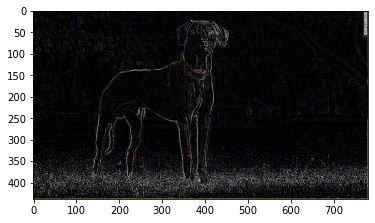

In [37]:
canny = img.filter(ImageFilter.FIND_EDGES)
plt.imshow(canny)